# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [2]:
#import the right packages
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt
from agent import DQH2Agent, DDQH2Agent, DQH3Agent, DDQH3Agent
from collections import deque
%matplotlib inline

env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the Unity environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
print(type(state))
state_size = len(state)
print('action_size = ', action_size, '  state_size = ', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
<class 'numpy.ndarray'>
action_size =  4   state_size =  37


In [4]:
def train(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99, train=True):
    """Deep Q-Learning.
    
    Args
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): flag deciding if the agent will train or just play through the episode
    """
    # scores from each episode
    scores = []  
    # scores from last 100 scores
    scores_window = deque(maxlen=100)  
    
    # initialize epsilon
    eps = eps_start  
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            
            # get the next state
            next_state = env_info.vector_observations[0]   
            
            # get the reward
            reward = env_info.rewards[0]                   
            
            # see if episode has finished
            done = env_info.local_done[0]     
            
            # go to next state
            agent.step(state, action, reward, next_state, done)
            # update the score
            score += reward  
            # roll over the state to next time step
            state = next_state     
            
            # exit loop if episode finished
            if done:                                       
                break
                
        # save most recent score        
        scores_window.append(score)       
        scores.append(score)              
        # decrease epsilon
        eps = max(eps_end, eps_decay*eps) 
        
        print('\rEpisode {}\tMean Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tMean Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and train:
            print('\nBanana Environment solved in {:d} episodes!\tScore: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.dqnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores

Deep Q-Network with 2 hiden layers using  BananaBrain
Episode 100	Mean Score: 0.58
Episode 200	Mean Score: 5.48
Episode 300	Mean Score: 9.48
Episode 400	Mean Score: 12.00
Episode 433	Mean Score: 13.04
Banana Environment solved in 433 episodes!	Score: 13.04


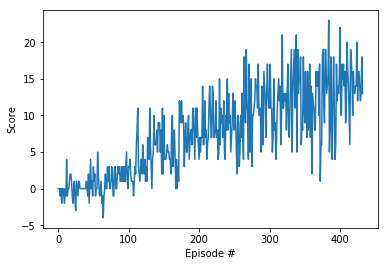

In [5]:
print('Deep Q-Network with 2 hiden layers using ', brain_name)
# Execute the deep-q learning process
agent = DQH2Agent(state_size=state_size, action_size=action_size, seed=0)
scores = train(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Double Deep Q-Network with 2 hiden layers using  BananaBrain
Episode 100	Mean Score: 0.07
Episode 200	Mean Score: 2.95
Episode 300	Mean Score: 7.69
Episode 400	Mean Score: 11.35
Episode 455	Mean Score: 13.07
Banana Environment solved in 455 episodes!	Score: 13.07


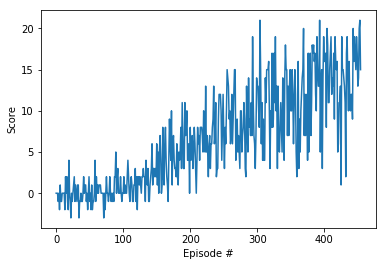

In [5]:
print('Double Deep Q-Network with 2 hiden layers using ', brain_name)
# Execute the deep-q learning process
agent = DDQH2Agent(state_size=state_size, action_size=action_size, seed=0)
scores = train(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Deep Q-Network with 3 hiden layers using  BananaBrain
Episode 100	Mean Score: 1.51
Episode 200	Mean Score: 5.01
Episode 300	Mean Score: 9.11
Episode 400	Mean Score: 12.34
Episode 410	Mean Score: 13.04
Banana Environment solved in 410 episodes!	Score: 13.04


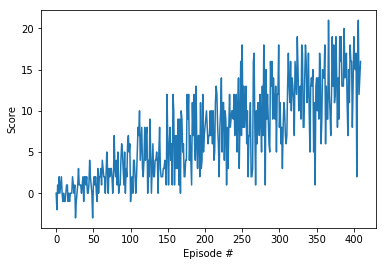

In [6]:
print('Deep Q-Network with 3 hiden layers using ', brain_name)
# Execute the deep-q learning process
agent = DQH3Agent(state_size=state_size, action_size=action_size, seed=0)
scores = train(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Double Deep Q-Network with 3 hiden layers using  BananaBrain
Episode 100	Mean Score: 1.62
Episode 200	Mean Score: 7.19
Episode 300	Mean Score: 10.60
Episode 366	Mean Score: 13.03
Banana Environment solved in 366 episodes!	Score: 13.03


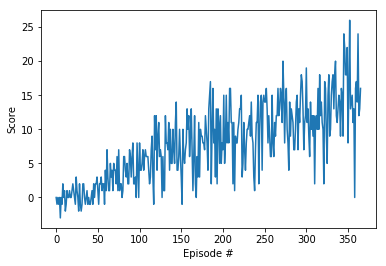

In [7]:
print('Double Deep Q-Network with 3 hiden layers using ', brain_name)
# Execute the deep-q learning process
agent = DDQH3Agent(state_size=state_size, action_size=action_size, seed=0)
scores = train(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()